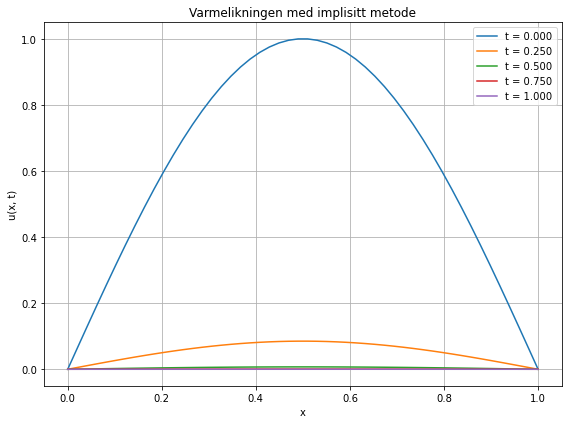

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

# Parametre
L = 1.0
T = 1.0
nx = 50
x = np.linspace(0, L, nx)
h = x[1] - x[0]

alpha = 0.4
k = alpha * h**2
nt = int(T / k)

u = np.sin(np.pi * x) # Initialbetingelse
u[0] = u[-1] = 0  # Randbetingelse

solutions = [u.copy()]

# Lager tridiagonalmatrisen i banded form
n_inner = nx - 2
diagonal = (1 + 2 * alpha) * np.ones(n_inner)
off_diagonal = -alpha * np.ones(n_inner - 1)

ab = np.zeros((3, n_inner))
ab[0, 1:] = off_diagonal  # Over-diagonal
ab[1, :] = diagonal      # Hoved-diagonal
ab[2, :-1] = off_diagonal  # Under-diagonal

# Tidssimulering
for _ in range(nt):
    u[1:-1] = solve_banded((1, 1), ab, u[1:-1])
    solutions.append(u.copy())

# Plot utvalgte tidspunkter
plt.figure(figsize=(8, 6))
for frac in [0, 0.25, 0.5, 0.75, 1.0]:
    t_idx = int(frac * (len(solutions) - 1))
    plt.plot(x, solutions[t_idx], label=f't = {t_idx * k:.3f}')

plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title("Varmelikningen med implisitt metode")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()